In [1]:
import sys
sys.path.append('..') 

from keithleyAPI import Communications
from tests_ import sensing_test,stability_test
import utils

C:\Users\desi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\desi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [15]:
import plotly.express as px 
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import os
import numpy as np

smu = Communications("TCPIP0::169.254.181.21::1225::SOCKET")
smu.connect()
smu._instrument_object.write_termination = "\0"
smu._instrument_object.read_termination = "\0"

In [58]:
DUT = 'd030824-II' # device under test
couple = 'r3c1'
VDL = 'CH1'
VDR = 'CH3'
CMN = 'CH2'

In [59]:
smu.query("BC") # clears all readings from buffer

'ACK'

# Diode connection Test

### To run a cell and go to the next one: Shift + enter
#### Run the following cell until it prints out "Device correctly stabilized"
Be sure to change the device under test on the last line

In [60]:
diode_df = []
mean_diff = []
TOT = 'DiodeConnected_StabilityforIonSensing-Na' #type of test

### Run Stability Check before sensing test

Sweep #: 1
|VDL-VDR|:  0.23507
mean diff of diff L-R: nan
std diff of diff L-R: nan


C:\Users\desi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

C:\Users\desi\anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\desi\anaconda3\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\desi\anaconda3\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning:

invalid value encountered in divide

C:\Users\desi\anaconda3\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide



Sweep #: 2
|VDL-VDR|:  0.20434
mean diff of diff L-R: 0.03073
std diff of diff L-R: 0.0
Sweep #: 3
|VDL-VDR|:  0.36191
mean diff of diff L-R: 0.29849
std diff of diff L-R: 0.26776
Sweep #: 4
|VDL-VDR|:  0.0002
mean diff of diff L-R: 0.31957
std diff of diff L-R: 0.22065
Sweep #: 5


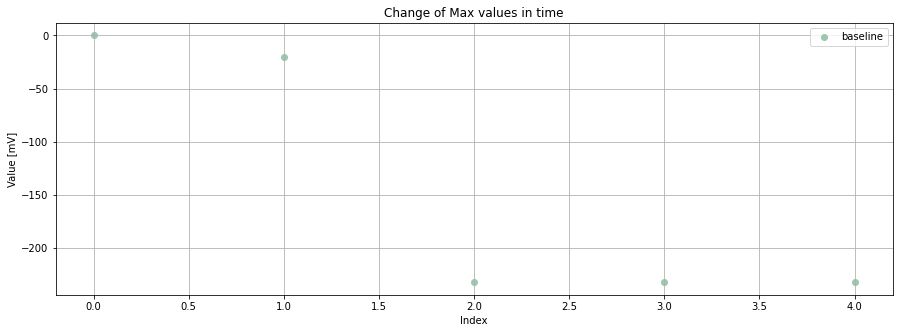

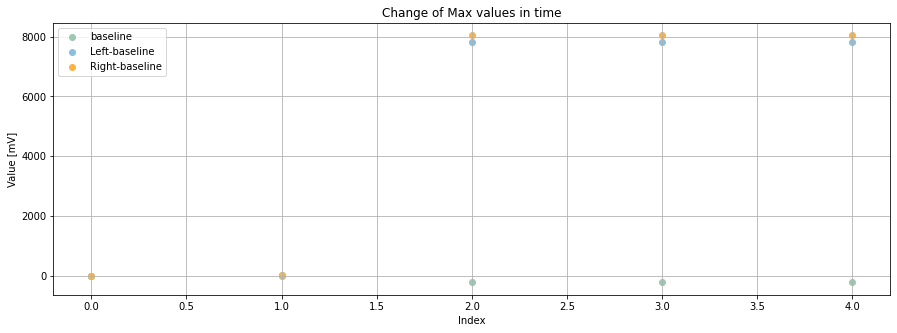

|VDL-VDR|:  0.0002
mean diff of diff L-R: 0.23968
std diff of diff L-R: 0.23593
Sweep #: 6
|VDL-VDR|:  0.0002
mean diff of diff L-R: 0.19174
std diff of diff L-R: 0.23178
Sweep #: 7


VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

In [61]:
 diode_df, mean_diff = stability_test('CH1', 'CH3', 'CH2', smu,diode_df,mean_diff,'sensing',couple,DUT,TOT,max_steps = 10,resting_time=10)

In [17]:
utils.save_xls(diode_df, DUT+couple,TOT,additional_comment= '80sweeps', mode = 2)

The directory doesn't exist
C:\Users\Desi\Desktop\TesiStanford\repo\WearS\Sensing\03192024-d030824-IIIr2c3-DiodeConnected_StabilityforAptamerSensing-CT


'03192024-d030824-IIIr2c3-DiodeConnected_StabilityforAptamerSensing-CT'

#### Run the following cell to plot the max values in time for the last sweeps

In [ ]:
utils.plot_max_values(diode_df,['baseline'],couple,1,DUT,TOT,3,r'C:\Users\Desi\Desktop\TesiStanford\images-results')

#### Plot Diode Connection

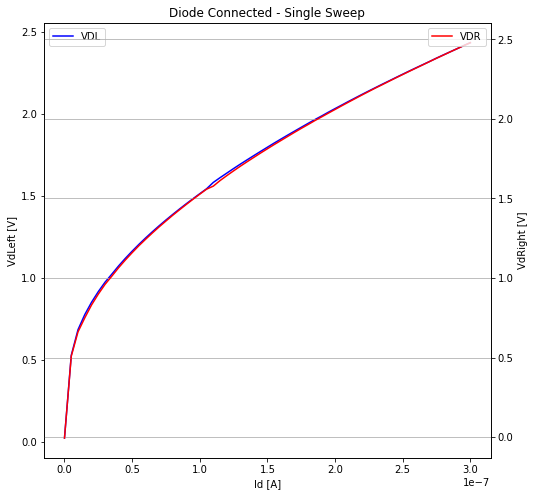

In [9]:
# plot DiodeConnection
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(diode_df[-1]['IDL'], diode_df[-1]['VDL'], color = 'blue', label = 'VDL')
ax1.set_ylabel('VdLeft [V]')
ax2.plot(diode_df[-1]['IDL'], diode_df[-1]['VDR'], color = 'red', label = 'VDR')
ax2.set_ylabel('VdRight [V]')
plt.grid()
ax1.set_xlabel('Id [A]')
plt.title('Diode Connected - Single Sweep')
ax1.legend()
ax2.legend(loc = 1)


# Sensing Test

### Run the following two cells only one time!

In [21]:
meandiff = []
stddiff = []
diode_dict_list = {} # dictionary where to store the list with the 20 sweeps of all the concentrations
diode_df_dict = {} # dictionary where to store the df with the 20 sweeps of all the concentrations
mean_std = [] #list where to store the mean and std of the òast 5 values of the last Nvalidsteps
mean_std_L = []
mean_std_R = []
baseline = 0

In [22]:
k = 0 # 10pM
conc = ['baseline','1pM','10pM','100pM','1nM','10nM','100nM','1uM']
#conc = ['1mM','2mM','4mM','8mM','16mM','32mM']

In [23]:
conc = ['10mM','20mM','40mM','80mM','160mM','16mMK','32mMK']
#conc = ['1mM','2mM','4mM','8mM','10mMNa','16mM','20mMNa','32mM']
#conc = ['baseline','1pM_CT','1pM_MT','10pM_CT','10pM_MT','100pM_CT','100pM_MT','1nM_CT','1nM_MT','10nM_CT','10nM_MT','100nM_CT','100nM_MT','1uM_CT','1uM_MT']
#conc = ['baseline','1pM','10pM','100pM','1nM','10nM','100nM','1uM','1nM-MT','100nm_MT']

### Run all the following cells until 'END' every time you change concentration

In [24]:
#baseline = 200 010324

In [45]:
TOT = 'DiodeConnected_SensingTest-Na' #Type Of Test
k, diode_df_dict, diode_dict_list, mean_std, mean_std_L, mean_std_R, folder, baseline = sensing_test('CH1', 'CH3', 'CH2', smu,k, conc, diode_df_dict, diode_dict_list, mean_std, mean_std_L, mean_std_R,DUT, TOT, couple, baseline)

Run #: 1
Run #: 2
Run #: 3
Run #: 4
Run #: 5
Run #: 6
Run #: 7
Run #: 8
Run #: 9
Run #: 10
Run #: 11
Run #: 12
Run #: 13
Run #: 14
Run #: 15
Run #: 16
Run #: 17
Run #: 18
Run #: 19
Run #: 20
The directory exists
C:\Users\Desi\Desktop\TesiStanford\repo\WearS\Sensing\03212024-d030824-I-DiodeConnected_SensingTest-Na
[[0.0, 0.00035175749222064734], [0.007080000000000197, 0.0016287827765952725], [0.008439999999999781, 0.001826800481716589], [0.004596666666667026, 0.0014814144892260407], [0.007909999999999862, 0.0004514790508243616]]


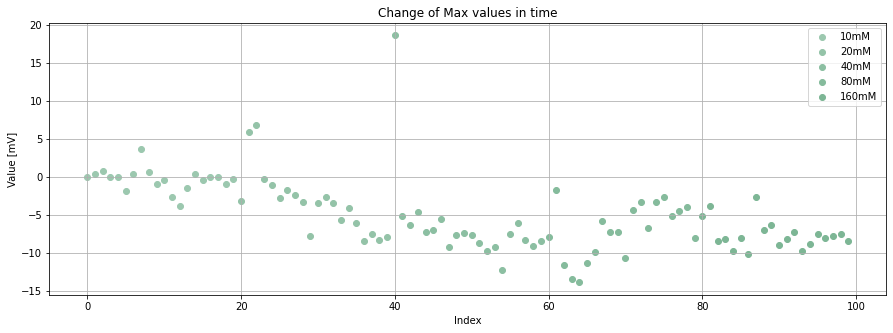

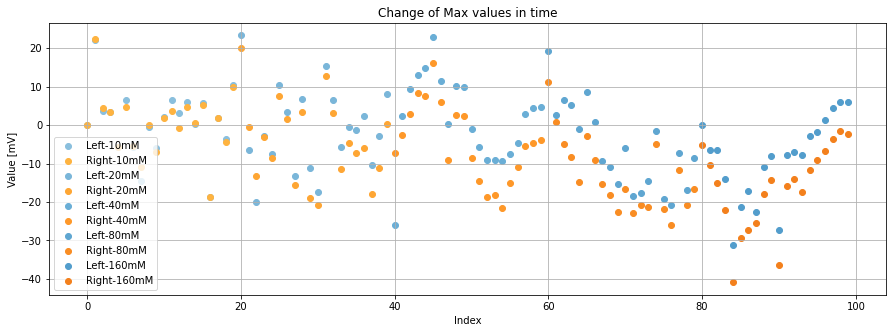

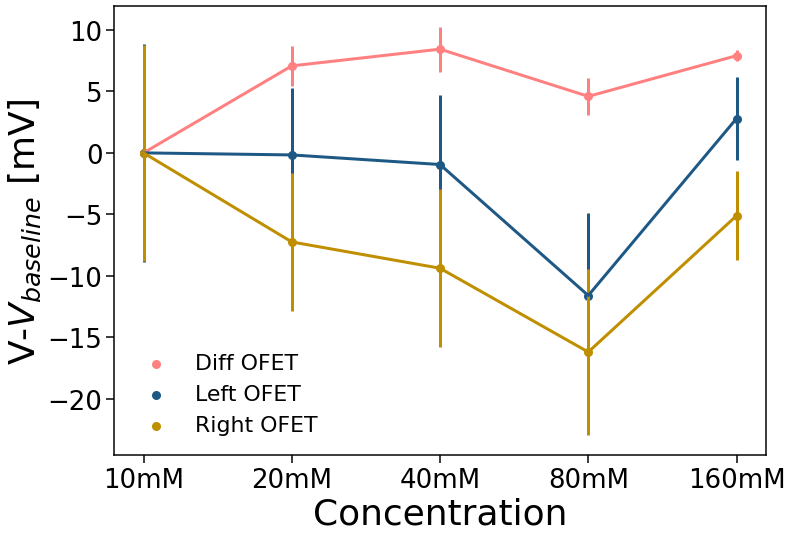

In [46]:
# printing the mean and the std of the last 5 values of the 20 sweeps. Each [] represents a concentration

# plotting change of MAx values in time for different concentrations
TOT = 'changeMaxDiffvaluesintime'
utils.plot_max_values(diode_df_dict,conc,couple,1,DUT,TOT, mode = 1)

# plotting change of Mx values in time for different concentrations for left and right electrodes
TOT = 'changeMaxDiffvaluesintime-LR'
utils.plot_max_values(diode_df_dict,conc,couple,1,DUT,TOT, mode = 2)

# plotting mean and std of the diff for different concentrations
utils.plot_mean_std(len(mean_std), mean_std_L,mean_std_R, mean_std, conc, couple, folder)



#### Interactive plot

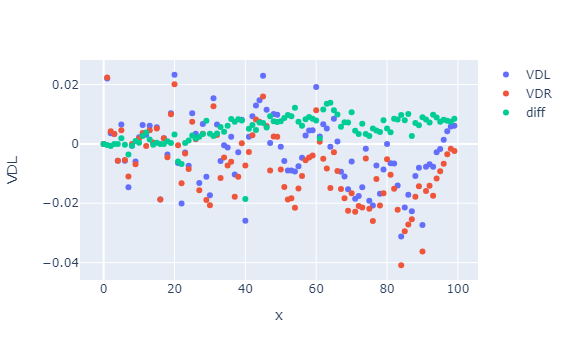

In [47]:
diff_in_time = pd.concat(diode_df_dict.values(), ignore_index=False)
numberoftests = len(diode_df_dict)
diff_in_time_grouped = diff_in_time.groupby(diff_in_time.index)
threshold = diff_in_time.index.max()

diff_in_time_max = [group for name, group in diff_in_time_grouped if name >= threshold]
fig = px.scatter(diff_in_time_max[0]-diff_in_time_max[0]['VDL'].iloc[0], x=range(len(diff_in_time_max[0])), y='VDL')
fig.data[0].name="VDL"
fig.update_traces(showlegend=True)
 
fig.add_scatter(x=np.array(range(len(diff_in_time_max[0]))), y=diff_in_time_max[0]['VDR']-diff_in_time_max[0]['VDR'].iloc[0], mode='markers',name = "VDR")
fig.add_scatter(x=np.array(range(len(diff_in_time_max[0]))), y=(diff_in_time_max[0]['VDL']-diff_in_time_max[0]['VDR'])-(diff_in_time_max[0]['VDL']-diff_in_time_max[0]['VDR']).iloc[0], mode='markers',name = "diff")
 
fig.show()

In [48]:
# std and mean only for the diff

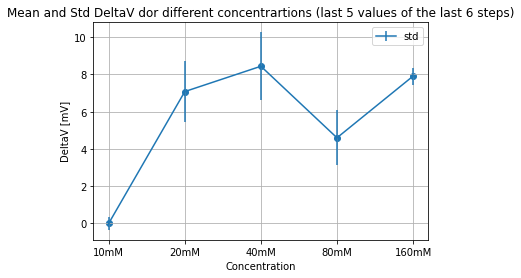

In [49]:
plt.scatter(conc[:k], [i[0]*1000 for i in mean_std] )
plt.errorbar(conc[:k], [i[0]*1000 for i in mean_std], yerr=[i[1]*1000 for i in mean_std], label='std')

plt.xlabel('Concentration')
plt.ylabel('DeltaV [mV]')
plt.title('Mean and Std DeltaV dor different concentrartions (last 5 values of the last 6 steps)')
plt.legend()
plt.grid()


In [84]:
mean_std

[[0.0, 0.0016194546407149926],
 [0.0008499999999993513, 0.0026138604910490144],
 [0.0017999999999998018, 0.0031873447674618588],
 [0.005303333333333438, 0.003240836654665272],
 [0.007130000000000081, 0.0026970601278676473],
 [0.013206666666665257, 0.003056695746862816],
 [0.013983333333333459, 0.002301844670886601],
 [0.013646666666666363, 0.004074300212579108],
 [0.017836666666667167, 0.0020228582638325454],
 [0.01912333333333338, 0.0017250185184190863],
 [0.01837999999999962, 0.002334773365161307],
 [0.013729999999999354, 0.0013038916110372568],
 [0.018899999999999473, 0.002336514498136069],
 [0.023383333333332867, 0.0013375433533991043]]

In [92]:
np.diff([i[0]-mean_std_L[0][0] for i in mean_std_L])

array([-0.00377667, -0.00613667, -0.00585333, -0.00306   , -0.00861667,
       -0.00697   , -0.01118   , -0.01018667, -0.00653   ])

In [93]:
np.diff([i[0]-mean_std_R[0][0] for i in mean_std_R])

array([-0.00053333, -0.00368667, -0.00496667, -0.00216667, -0.00914   ,
       -0.00580667, -0.01037667, -0.00765   , -0.00645333])

ValueError: x and y must be the same size

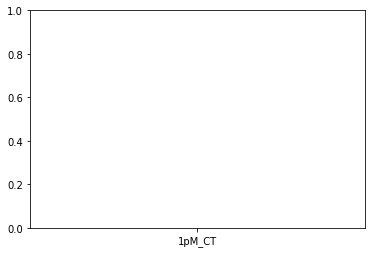

In [53]:
plt.scatter(conc[1:],np.diff([i[0] for i in mean_std_L])-np.diff([i[0]-mean_std_R[0][0] for i in mean_std_R]))

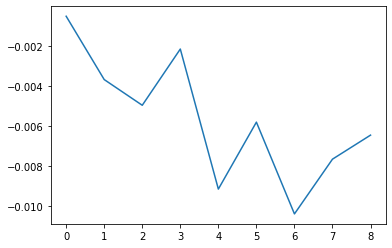

In [73]:
plt.plot(np.diff([i[0] for i in mean_std_R]))

In [71]:
[i[0] for i in mean_std_L]

[1.8691566666666666,
 1.8653799999999998,
 1.8592433333333334,
 1.8533899999999999,
 1.8503300000000003,
 1.8417133333333335,
 1.8347433333333334,
 1.8235633333333334,
 1.8133766666666664,
 1.8068466666666665]

In [74]:
np.diff([i[0] for i in mean_std_L])

array([-0.00377667, -0.00613667, -0.00585333, -0.00306   , -0.00861667,
       -0.00697   , -0.01118   , -0.01018667, -0.00653   ])